In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
xSet = np.transpose([np.arange(0,12.56,0.25)])
ySet = np.add(np.multiply(np.sin(xSet),0.5),0.5)
#print(xSet,ySet)

In [3]:
inputUnits = 1
hiddenUnits = 50
outputUnits = 1

hiddenLayers = 4

initSeed = 420

In [4]:
with tf.name_scope('Input'):
    x = tf.placeholder(tf.float32,[None,inputUnits])
with tf.name_scope('Output'):
    y = tf.placeholder(tf.float32,[None,outputUnits])

In [5]:
with tf.name_scope('Weights'):
    weights = [None] * (hiddenLayers + 1)
    weights[0] = tf.Variable(tf.random_normal([inputUnits,hiddenUnits],seed=initSeed),name=("Hidden_Weights0"))
    for i in range(1,hiddenLayers+1):
        if i == (hiddenLayers):
            weights[i] = tf.Variable(tf.random_normal([hiddenUnits,outputUnits],seed=initSeed),name=("Output_Weights"))
        else:
            weights[i] = tf.Variable(tf.random_normal([hiddenUnits,hiddenUnits],seed=initSeed),name=("Hidden_Weights" + str(i)))

with tf.name_scope('Biases'):
    biases = [None] * (hiddenLayers + 1)
    for i in range(0,hiddenLayers+1):
        if i == (hiddenLayers):
            biases[i] = tf.Variable(tf.random_normal([outputUnits],seed=initSeed),name=("Output_Biases"))
        else:
            biases[i] = tf.Variable(tf.random_normal([hiddenUnits],seed=initSeed),name=("Hidden_Biases" + str(i)))

In [6]:
with tf.name_scope('Hidden0'):
    hiddenLayerTensors = [None] * hiddenLayers
    hiddenLayerTensors[0] = tf.add(tf.matmul(x,weights[0]),biases[0])
    hiddenLayerTensors[0] = tf.nn.sigmoid(hiddenLayerTensors[0])
    
for i in range(1,hiddenLayers):
    with tf.name_scope('Hidden'+str(i)):
        hiddenLayerTensors[i] = tf.add(tf.matmul(hiddenLayerTensors[i-1],weights[i]),biases[i])
        hiddenLayerTensors[i] = tf.nn.sigmoid(hiddenLayerTensors[i])
            
with tf.name_scope('yHat'):
    yHat = tf.add(tf.matmul(hiddenLayerTensors[hiddenLayers-1],weights[hiddenLayers]),biases[hiddenLayers])
    yHat = tf.nn.sigmoid(yHat)

In [19]:
with tf.name_scope('Init'):
    init = tf.global_variables_initializer()
with tf.name_scope('Loss'):
    loss = tf.reduce_sum(tf.square(y-yHat))
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    training = optimizer.minimize(loss)
    tf.summary.scalar('Loss',loss)

In [20]:
sess = tf.Session()
sess.run(init)
writer = tf.summary.FileWriter("C:/Users/Preston/Anaconda3/envs/tensorflow/tensorboard_graphs", sess.graph)
for i in range(0,20000):
    sess.run(training,{x:xSet,y:ySet})
    if i % 100 == 0:
        mergedSummary = sess.run(tf.summary.merge_all(),{x:xSet,y:ySet})
        writer.add_summary(mergedSummary,i)

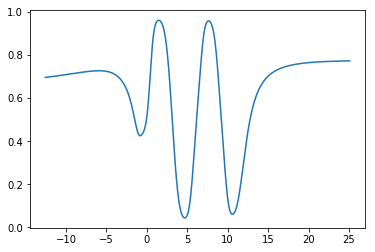

In [25]:
plt.plot(np.transpose([np.arange(-12.56,25.12,0.05)]), sess.run(yHat,{x:np.transpose([np.arange(-12.56,25.12,0.05)])}))

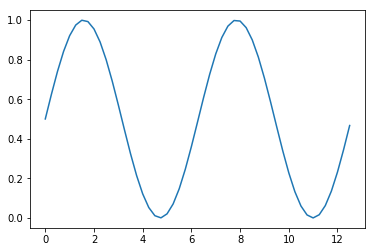

In [22]:
plt.plot(xSet, ySet)

In [23]:
sess.run(loss,{x:xSet,y:ySet})

0.15985221